# Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [78]:
# dataframes
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
states = pd.merge(facts, dates, left_on='USPS_code', right_on='Abbreviation',how='outer')

In [81]:
# 1
print('1. Which entities (top 5) had the largest population density in 2020?')
facts['Pop_density'] = facts['Pop_2020'] / facts['Area_land']
facts = facts.sort_values(by='Pop_density', ascending=False)
for entity in facts['State'].head(5):
    print(entity)

1. Which entities (top 5) had the largest population density in 2020?
 District of Columbia 
 New Jersey 
 Rhode Island 
 Puerto Rico 
 Massachusetts 


In [82]:
# 2
print('2. Which entities have more water area than land area? (top 3)')
for entity in facts[facts['Area_land']<facts['Area_water']]['State'].head(3):
    print(entity)

2. Which entities have more water area than land area? (top 3)
 United States Virgin Islands 
 American Samoa 
 Guam 


In [83]:
# 3 
print('3. Which entities increased in population the most in the last 10 years?')
facts['Pop_increase'] = facts['Pop_2020'] - facts['Pop_2010']
facts = facts.sort_values(by='Pop_increase', ascending=False)
for entity in facts['State'].head(3):
    print(entity)

3. Which entities increased in population the most in the last 10 years?
 Texas 
 Florida 
 California 


In [84]:
# 4 
print('4. What state bird accounts for the largest population as of 2020? Land area?')
birds_pop = facts[['Pop_2020', 'State_bird']].groupby(by='State_bird').sum()
birds_land = facts[['Area_land', 'State_bird']].groupby(by='State_bird').sum()
print(birds_pop.sort_values(by='Pop_2020', ascending=False).head(1).index[0])
print(birds_land.sort_values(by='Area_land', ascending=False).head(1).index[0])

4. What state bird accounts for the largest population as of 2020? Land area?
Northern mockingbird 
Willow ptarmigan 


In [85]:
# 5
print('5. How many entities\' largest city is their capital city?')
city_capital = facts[facts['Capital']==facts['City_1']][['State','Capital','City_1']]
print(len(city_capital))


5. How many entities' largest city is their capital city?
17


In [86]:
# 6 
print('6. Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)')
facts['Pop_spread'] = 100*(facts['city_1_pop']-facts['city_5_pop'])/(facts['city_1_pop'])
facts = facts.sort_values(by='Pop_spread', ascending=False)
print(facts['State'].values[0])

6. Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)
 New York 


In [87]:
# 7 
print('7. Of the states that joined the United States before 1790, what is the most common state flower?')
states['Date'] = pd.to_datetime(states['Date'])
print(states[states['Date']<pd.datetime(1790, 1 ,1)]['State_flower'].value_counts().head(1).index[0])

7. Of the states that joined the United States before 1790, what is the most common state flower?
Mountain laurel


<ipython-input-87-af7d5ee43ca4>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print(states[states['Date']<pd.datetime(1790, 1 ,1)]['State_flower'].value_counts().head(1).index[0])


In [88]:
# 8 
print('8. Which has the larger population density, the most dense US Territory or the least dense state?')
states['Pop_density'] = states['Pop_2020'] / states['Area_land']
sta = states[(states['Status']=='State')].sort_values(by='Pop_density', ascending=True).head(1)
ter = states[(states['Status']=='Territory')].sort_values(by='Pop_density', ascending=False).head(1)
if sta['Pop_density'].values[0] > ter['Pop_density'].values[0]:
    print('The least dense US State')
else:
    print('The most dense US Territory')

8. Which has the larger population density, the most dense US Territory or the least dense state?
The most dense US Territory


9. Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black


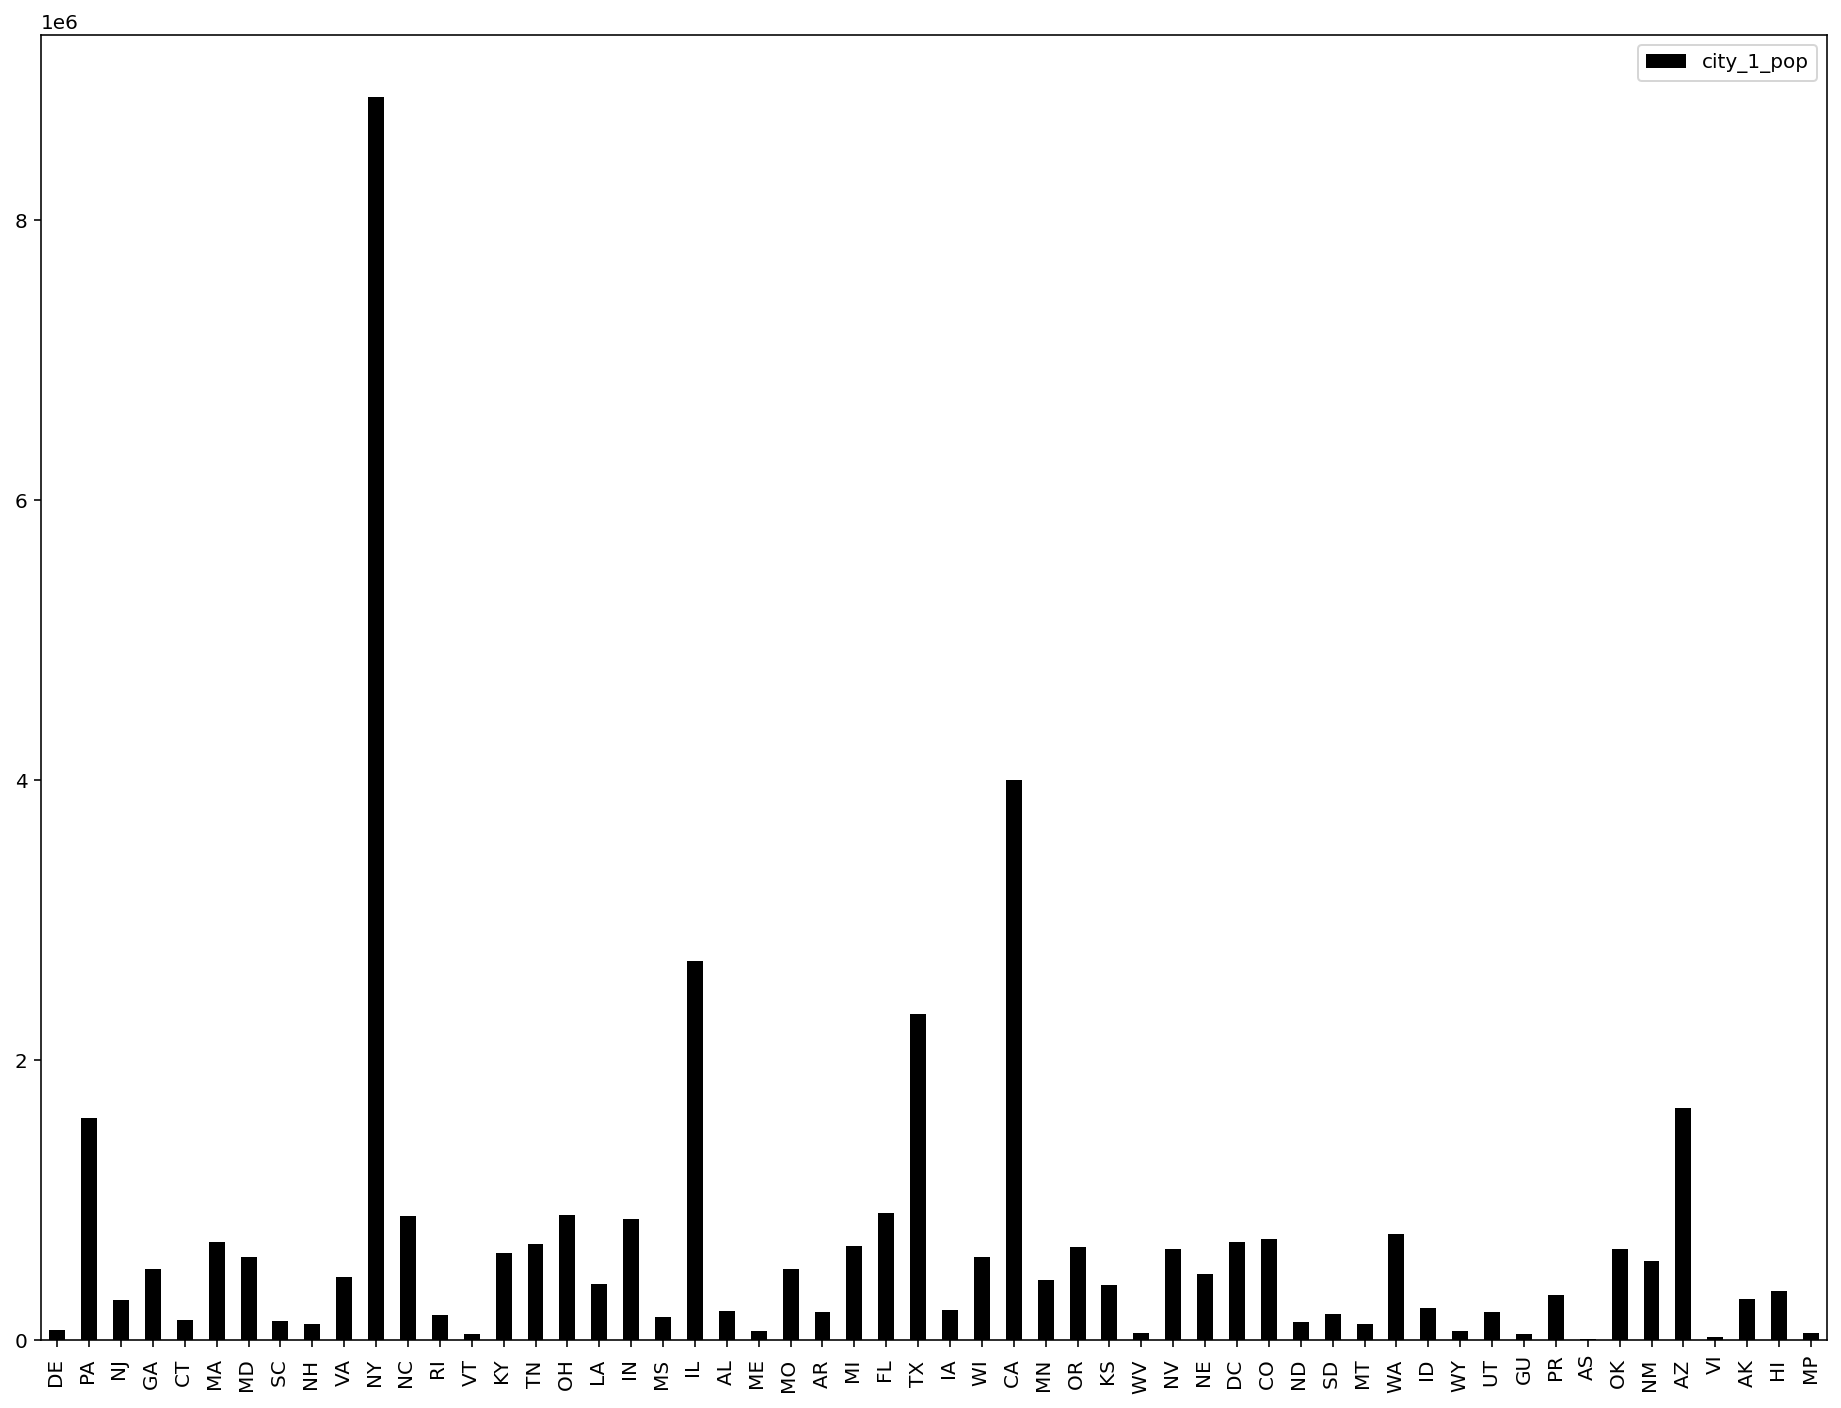

In [111]:
# 9
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

print('9. Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black')
states = states.sort_values(by='Date', ascending=True)
plot = states[['city_1_pop','Abbreviation']].plot(kind='bar', 
                                                  legend=True,
                                                  width=.5,
                                                  figsize=(16, 12),
                                                  color=['black'])
plot.set_xticklabels(states['Abbreviation']);

10. Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)


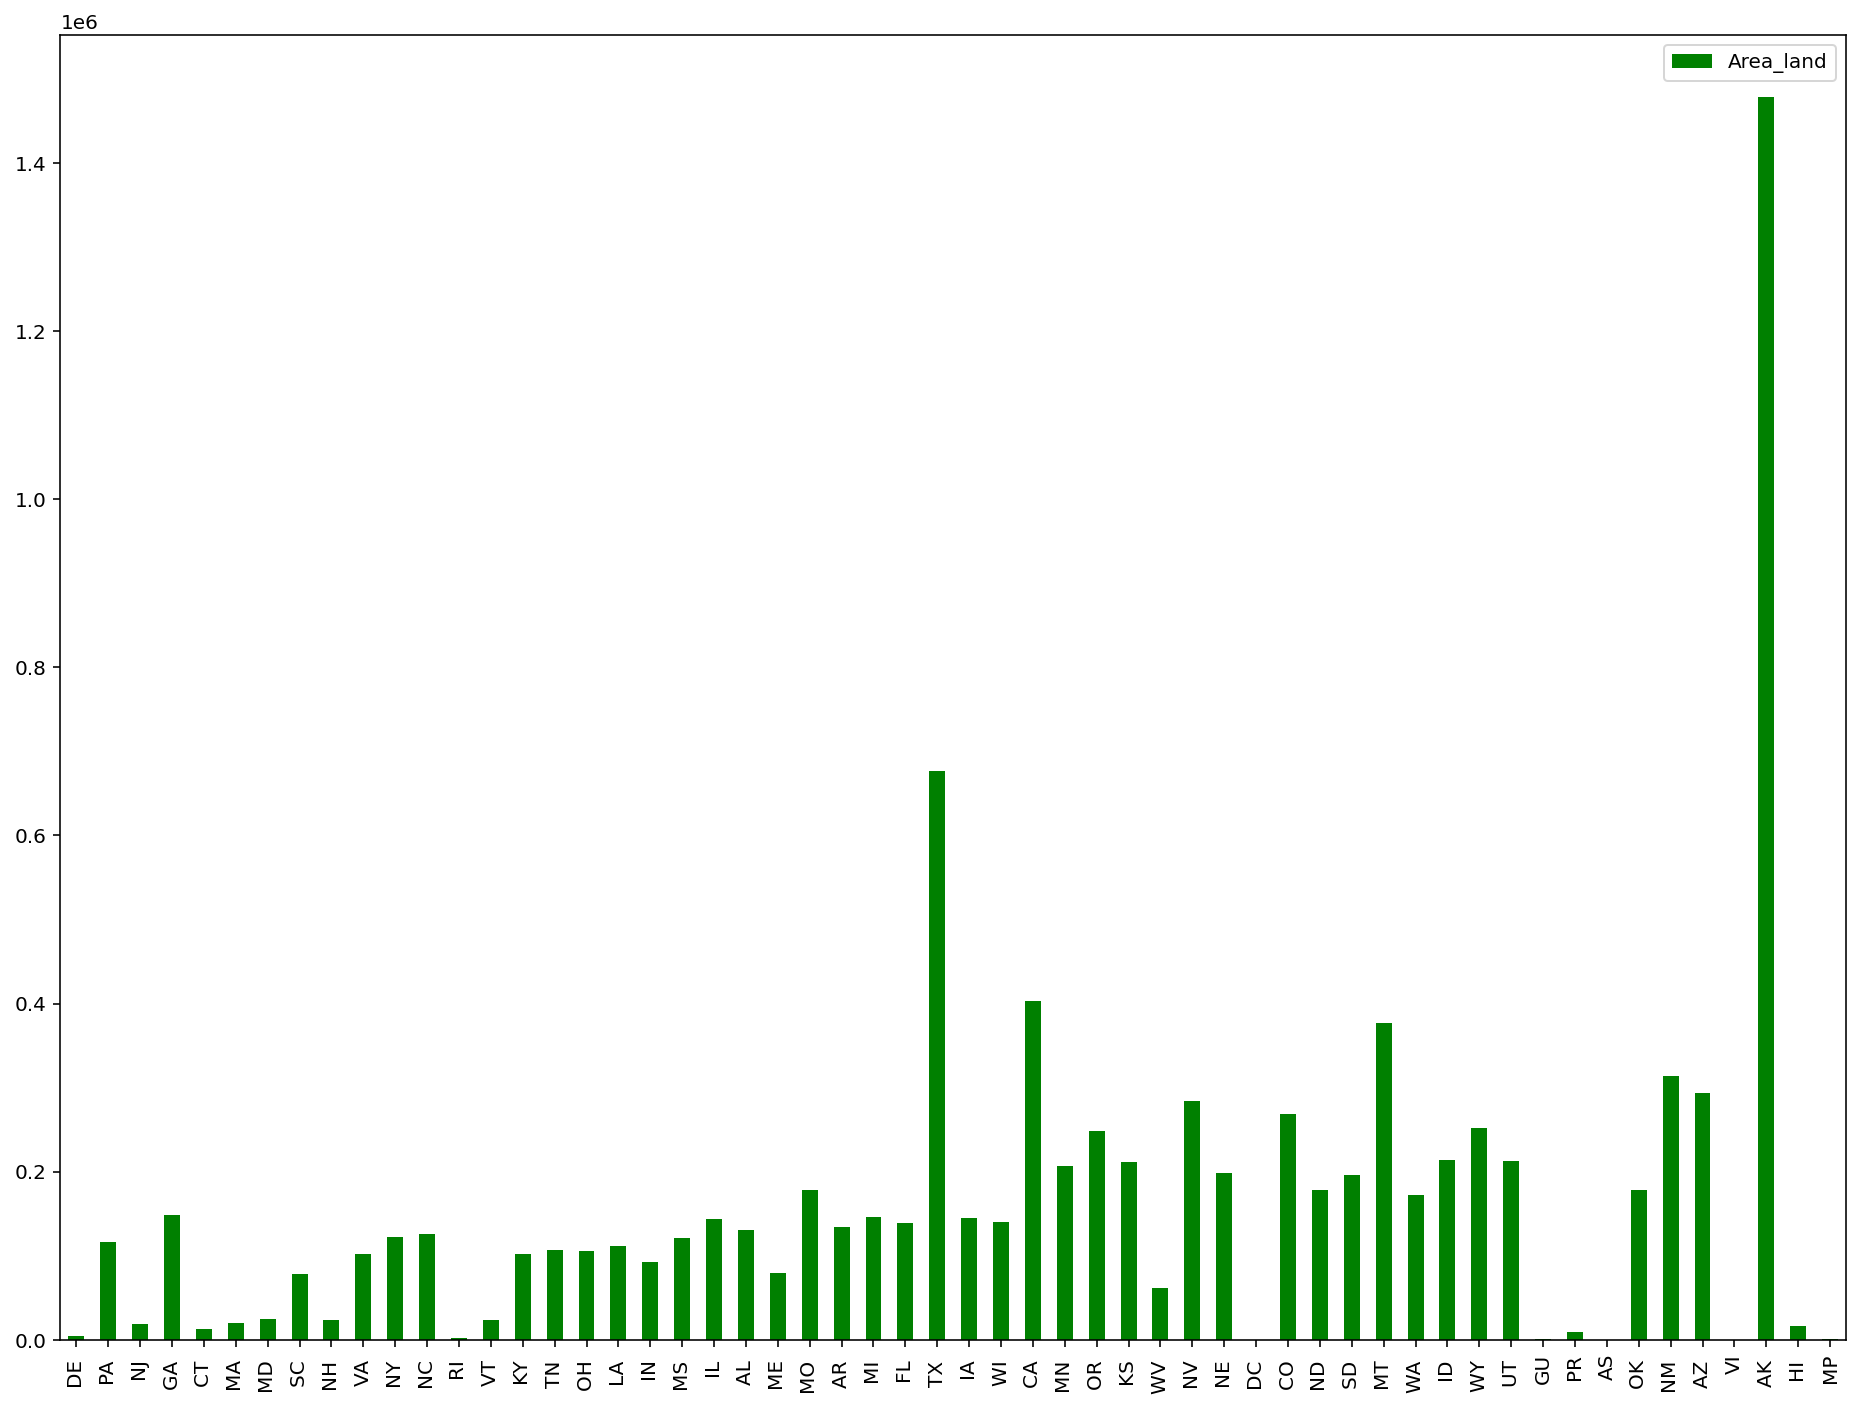

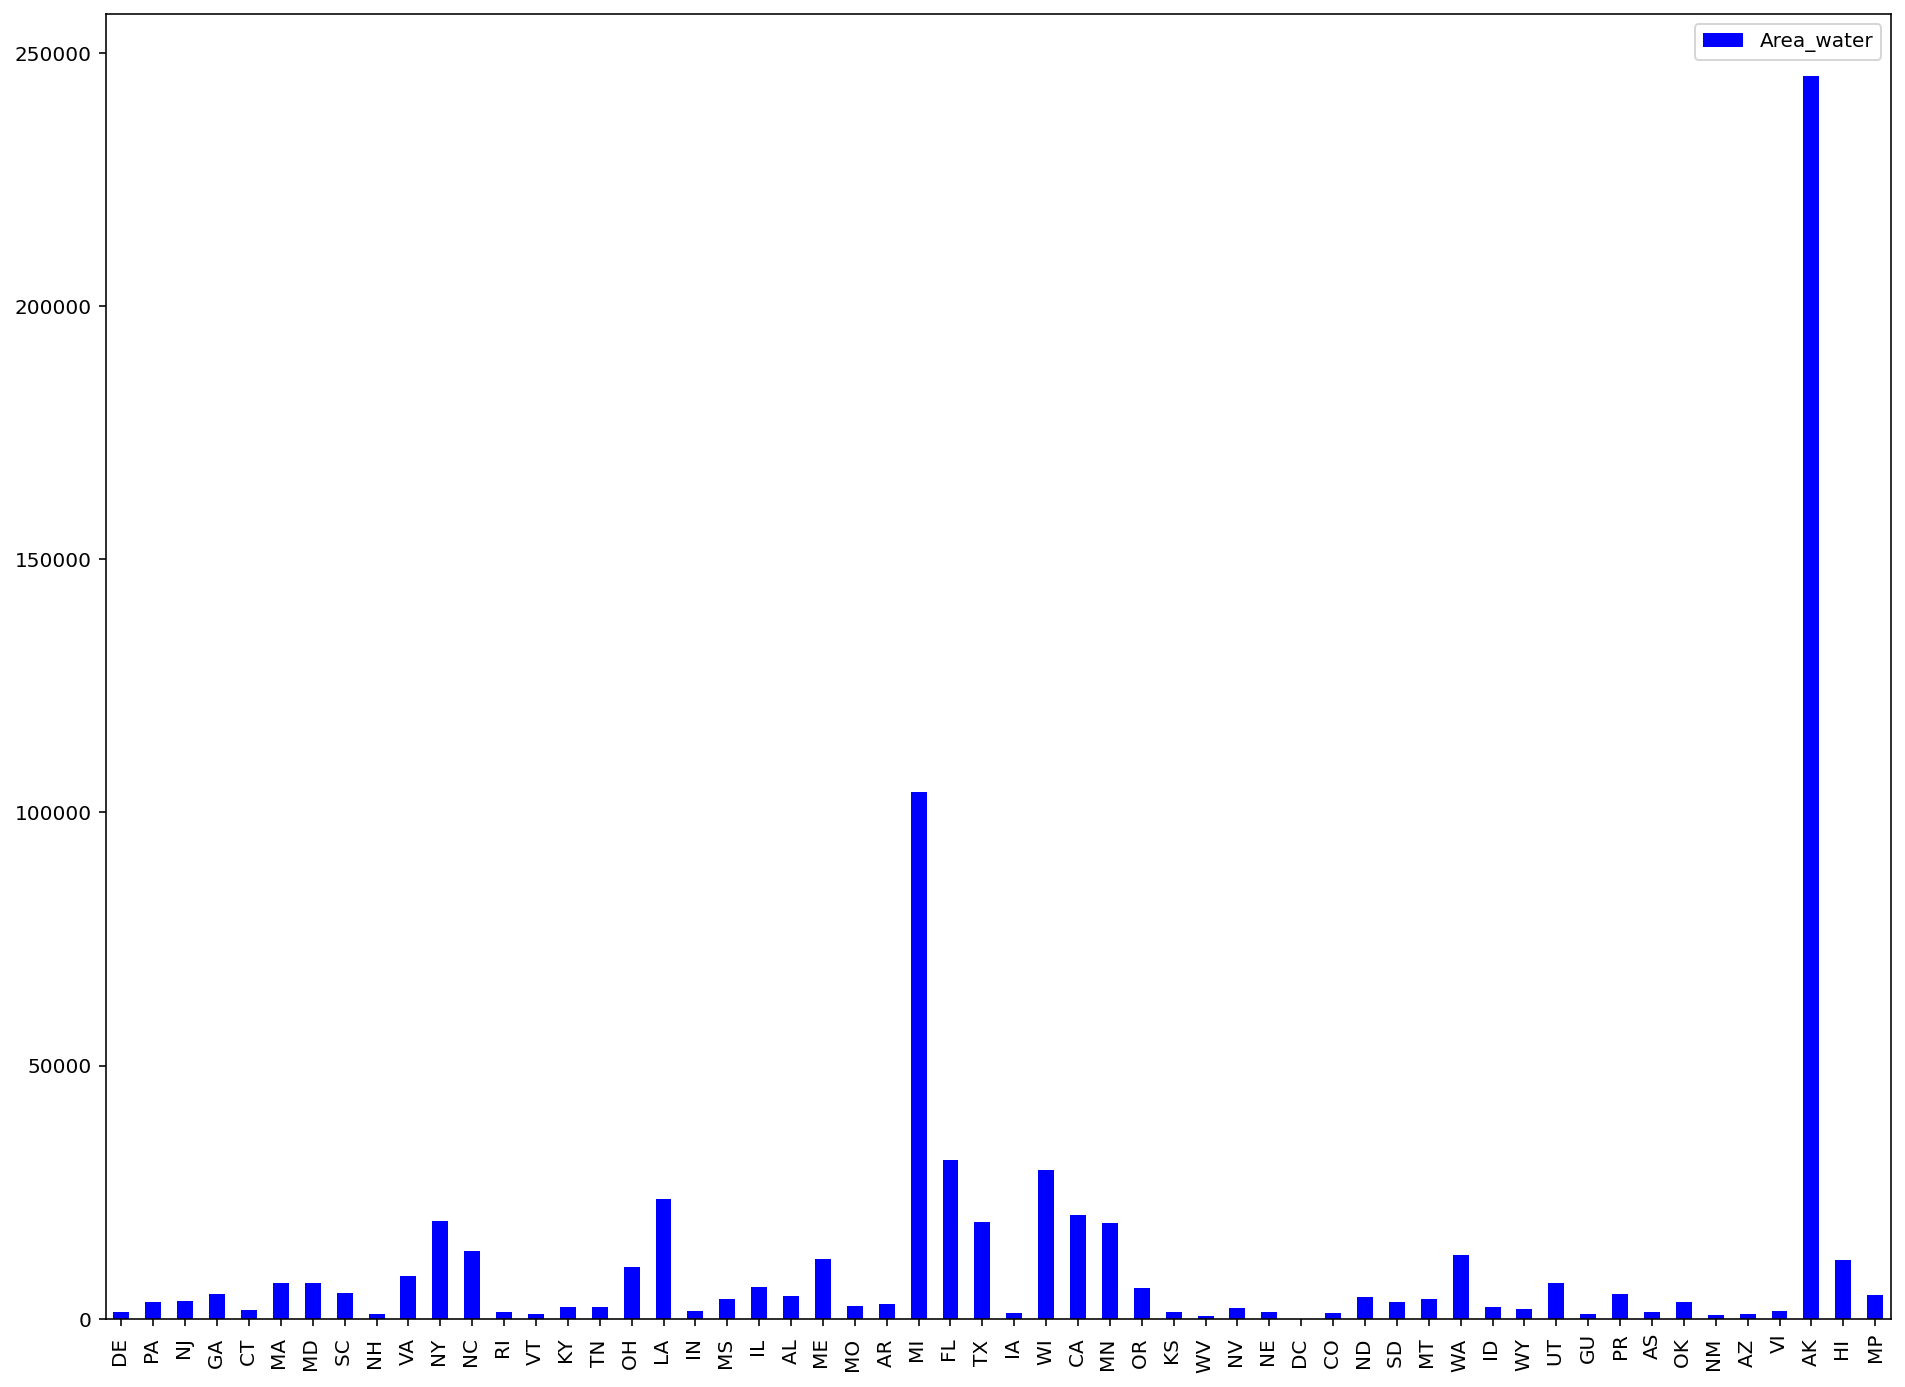

In [118]:
# 10
print('10. Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)')
states = states.sort_values(by='Date', ascending=True)
plot = states[['Area_land','Abbreviation']].plot(kind='bar', 
                                                  legend=True,
                                                  width=.5,
                                                  figsize=(16, 12),
                                                  color=['green'])
plot.set_xticklabels(states['Abbreviation']);

states = states.sort_values(by='Date', ascending=True)
plot = states[['Area_water','Abbreviation']].plot(kind='bar', 
                                                  legend=True,
                                                  width=.5,
                                                  figsize=(16, 12),
                                                  color=['blue'])
plot.set_xticklabels(states['Abbreviation']);

